In [137]:
#Importing libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
pd.set_option("display.max_columns", None)

df=pd.read_csv("loan.csv", low_memory=False)
df.shape
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [139]:
#Check Shape, Info & Datatypes
print(df.shape)
print(df.info())
print(df.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


### Data Cleaning

In [140]:
# Drop columns with 40% null values
df.drop(columns=df.columns[df.isnull().mean() > 0.4], inplace=True)

df.shape

(39717, 54)

In [141]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [142]:
# delete all the columns with unique, text content, sub level
df.drop([
    'url',
    'member_id', 
    'desc',
    'title',
    'sub_grade',
    'emp_title'
],axis=1, inplace=True)
df.shape

(39717, 48)

In [143]:
# Remove post-approval behavioural data columns as they are not available during loan approval
behavioural_columns = [
    'delinq_2yrs', 
    'earliest_cr_line', 
    'last_pymnt_amnt', 
    'inq_last_6mths', 
    'open_acc', 
    'pub_rec', 
    'revol_bal',
    'total_acc',
    'out_prncp', 
    'out_prncp_inv', 
    'total_pymnt', 
    'total_pymnt_inv', 
    'total_rec_prncp', 
    'total_rec_int', 
    'total_rec_late_fee', 
    'recoveries', 
    'collection_recovery_fee', 
    'application_type',
]

df.drop(columns=behavioural_columns, inplace=True)

In [144]:
# Drop the identified columns (unique value count is 1)
cols_to_drop = [col for col in df.columns if df[col].nunique(dropna=True) == 1]
df.drop(columns=cols_to_drop, inplace=True)

df.shape

(39717, 21)

### Update data types

In [145]:
df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
revol_util               object
last_pymnt_d             object
pub_rec_bankruptcies    float64
dtype: object

In [146]:
df.term.value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

In [147]:
df.term = df.term.apply(lambda x: str(x).replace(" months",""))
df.term = df.term.astype("int")

df.term.value_counts()

term
36    29096
60    10621
Name: count, dtype: int64

In [148]:
df.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [149]:
df.int_rate = df.int_rate.apply(lambda x: str(x).replace("%",""))
df.int_rate = df.int_rate.astype("float")

In [150]:
df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [151]:
df['emp_length'] = df['emp_length'].replace(['10+ years', '< 1 year', np.nan], ['10', '0', np.nan]).str.extract('(\d+)')[0]

In [152]:
df.zip_code.value_counts()

zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: count, Length: 823, dtype: int64

In [153]:
df.zip_code = df.zip_code.apply(lambda x: str(x).replace("xx",""))
df.zip_code = df.zip_code.astype("int")

In [154]:
df.revol_util.value_counts()

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [155]:
df.revol_util = df.revol_util.apply(lambda x: str(x).replace("%",""))
df.revol_util = df.revol_util.astype("float")

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  int32  
 5   int_rate              39717 non-null  float64
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [157]:
df.isnull().mean()*100

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
revol_util              0.125891
last_pymnt_d            0.178765
pub_rec_bankruptcies    1.754916
dtype: float64

In [163]:
# Filling the null with median 
df.emp_length.fillna(int(df.emp_length.median()), inplace=True)
df.emp_length = df.emp_length.astype("int")

df.revol_util.fillna(df.revol_util.median(), inplace=True)
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0], inplace=True)

In [164]:
# checking for null
df.isnull().mean()*100

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
revol_util              0.0
last_pymnt_d            0.0
pub_rec_bankruptcies    0.0
dtype: float64

### Finding outliers

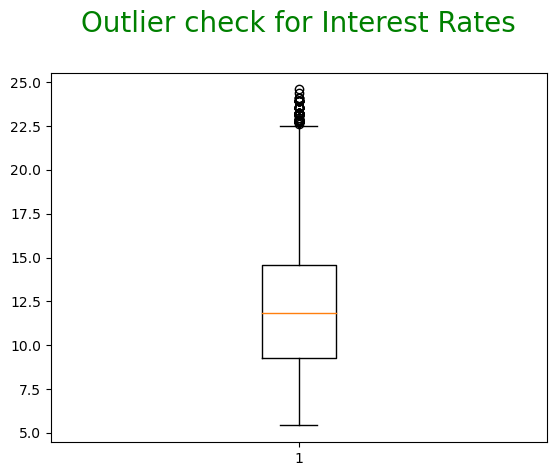

In [165]:
#Check for outlier in interest rate column
plt.boxplot(df.int_rate)
plt.title('Outlier for Interest Rates\n',fontsize=20,color='g')
plt.show()

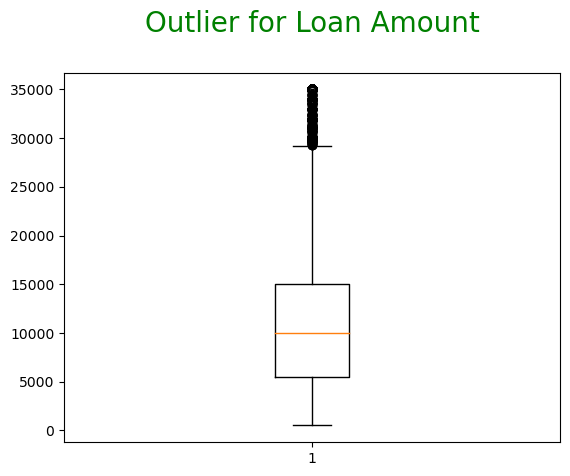

In [166]:
#plot loan_amnt to determine outlier
plt.boxplot(df.loan_amnt)
plt.title('Outlier for Loan Amount\n',fontsize=20,color='g')
plt.show()

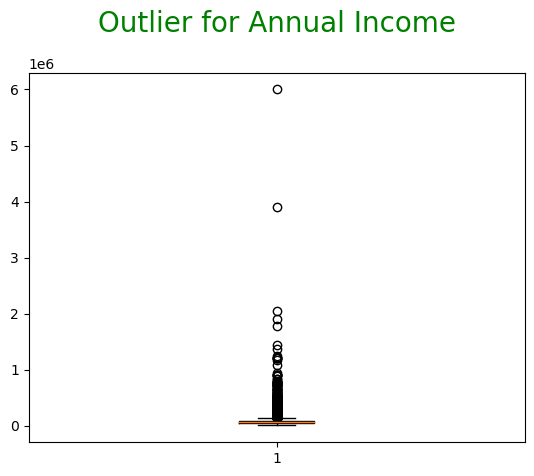

In [167]:
#Plot annual income to find outliers
plt.boxplot(df.annual_inc)
plt.title('Outlier for Annual Income\n',fontsize=20,color='g')
plt.show()

Insights:

The interest rates for most loans are below 15%. However, some loans have higher rates, going beyond this upper limit.
The loan amounts generally don't exceed 15k with the maximum around 35k. This range is not unusually high, so these amounts are typical and not considered outliers in our analysis.

Recommendations:
We should keep all the current records in our dataset. Since there are only a few cases with higher values, they won't significantly affect our overall analysis.

## Univariate Analysis

#### 1. Plot a histogram to view the distribution of interest rates

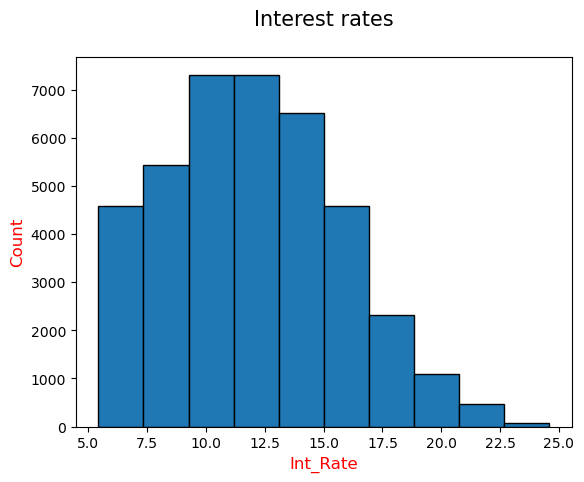

In [171]:
plt.title('Interest rates\n',fontsize=15)
plt.hist(df.int_rate,bins=10, edgecolor='black')
plt.xlabel("Int_Rate", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'red'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'red'})
plt.show()

Insights:

The chart indicates that the number of borrowers with annual incomes between 0 and 15k is approximately equal.

c:\Users\gladw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


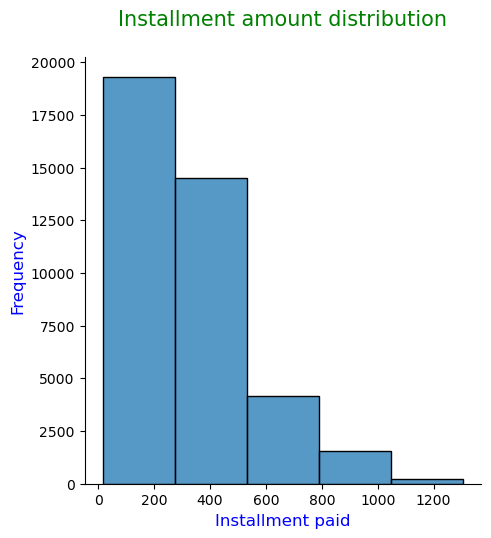

In [172]:
# Plot installements to see its distribution
sns.displot(df.installment,bins=5)
plt.title('Installment amount distribution\n',fontsize=15,color='green')
plt.xlabel("Installment paid", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'blue'})
plt.ylabel("Frequency", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'blue'})
plt.show()

Insights:

The installment amounts gradually rise and peak within the range of 200 to 400, before gradually declining. It's observed that the majority of borrowers make payments within this 200 to 400 range.

### Segmented univariate
#### 4. Plot to view the status of loans is composed

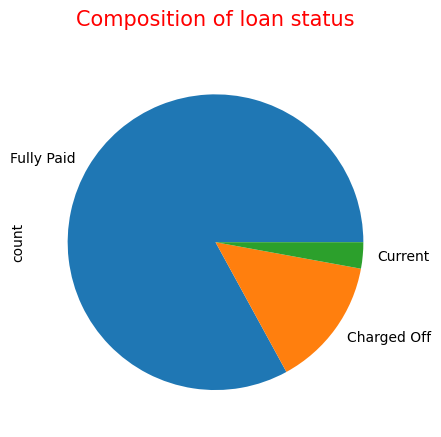

In [173]:
df.loan_status.value_counts().plot.pie()
plt.title('Composition of loan status\n',fontsize=15,color='red')
plt.show()


Insights:

The majority of the loans are fully repaid, while only a small portion end up being charged off. Providing specific percentages would offer a clearer understanding of this distribution.

In [174]:
# find the percentage of loans in each status
(df.groupby(by='loan_status').size())/(df.loan_status.count())*100

loan_status
Charged Off    14.167737
Current         2.870307
Fully Paid     82.961956
dtype: float64

#### Review and plot the verification status

verification_status
Not Verified       42.603923
Source Verified    25.145404
Verified           32.250674
dtype: float64


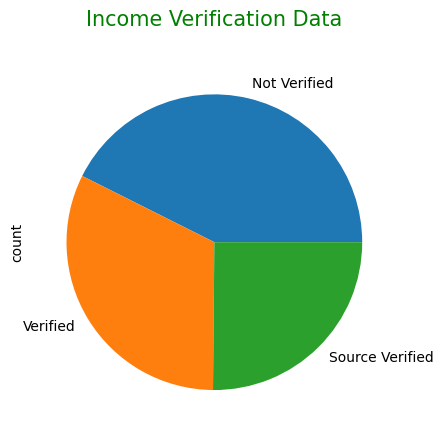

In [175]:
# Plot the distribution of verification status
print ((df.groupby(by='verification_status').size())/(df.verification_status.count())*100)
plt.title('Income Verification Data\n',fontsize=15,color='green')
df.verification_status.value_counts().plot.pie()
plt.show()

##### Plot purpose of the loan

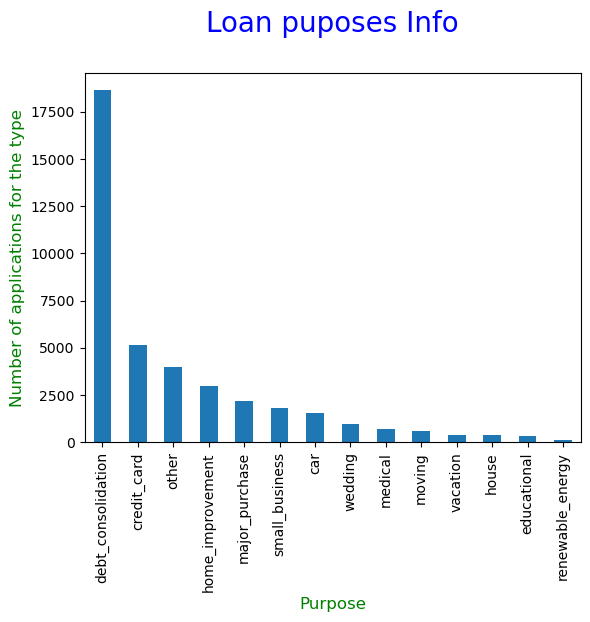

In [176]:
df.purpose.value_counts().plot.bar()
plt.title('Loan puposes Info\n',fontsize=20,color='b')
plt.xlabel("Purpose", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'g'})
plt.ylabel("Number of applications for the type", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'g'})
plt.show()

Insights:
 The primary reasons for most loan applications are debt consolidation and credit card payments.

Recommendation:
We should analyze the loan status specifically for loans taken out for debt consolidation and credit card payments. This will help us understand if there's a higher tendency towards defaults in these categories.

### Multivariate Analysis

##### 1. Get the correlaion

In [177]:
cor_col = ["loan_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti"]
loan_cor = df.filter(cor_col, axis=1)
corr = loan_cor.corr(method="pearson")
corr

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
loan_amnt,1.000000,0.940034,0.309415,0.930288,0.271149,0.066439
funded_amnt_inv,0.940034,1.000000,0.306657,0.905039,0.254375,0.074689
int_rate,0.309415,0.306657,1.000000,0.282703,0.053185,0.111162
installment,0.930288,0.905039,0.282703,1.000000,0.270874,0.054186
annual_inc,0.271149,0.254375,0.053185,0.270874,1.000000,-0.122732
dti,0.066439,0.074689,0.111162,0.054186,-0.122732,1.000000


#####  Create the Heatmap identify the correlation

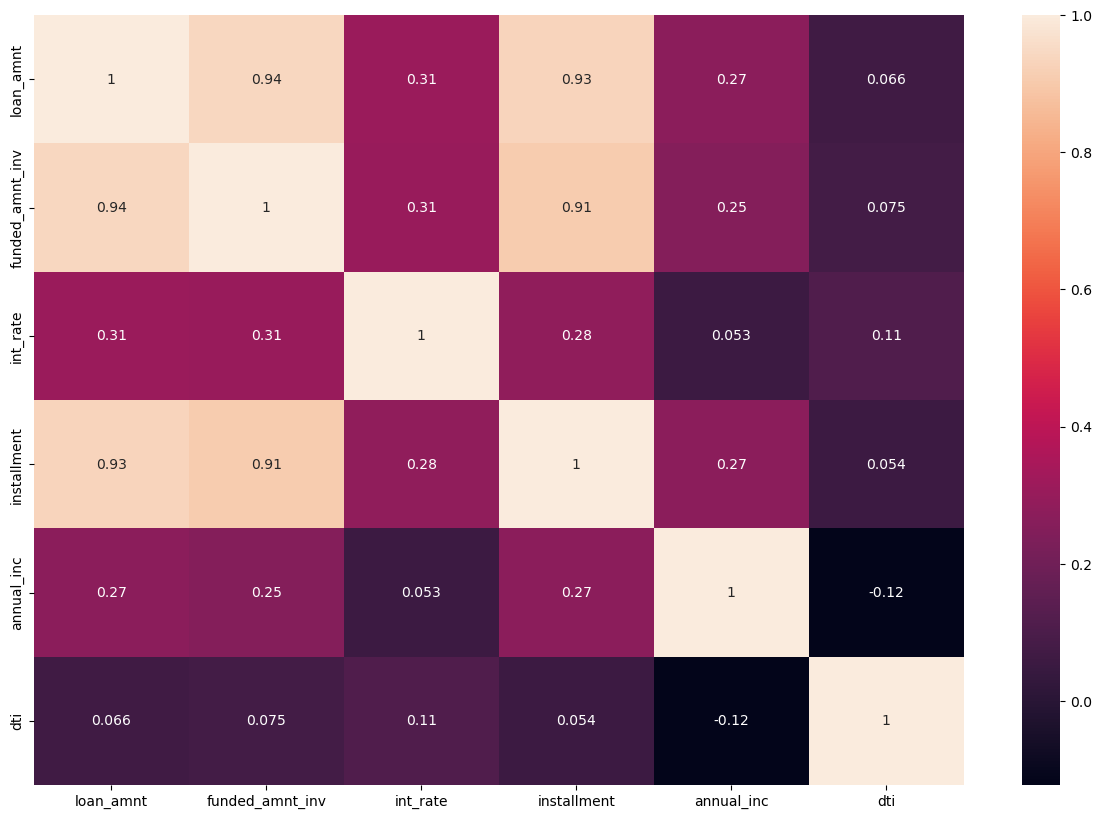

In [178]:
plt.subplots(figsize = (15,10))
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)
plt.show()

Insight:

It shows strong positive correlations between the loan amount, funded amount by investors, and installment payments, indicating they tend to increase together. Interest rates have a slight positive correlation with loan amounts. Additionally, there's a weak negative correlation between annual income and debt-to-income ratio, suggesting that higher income is associated with lower debt relative to income.

Employee Length / Funded Amount For Loan Purpose

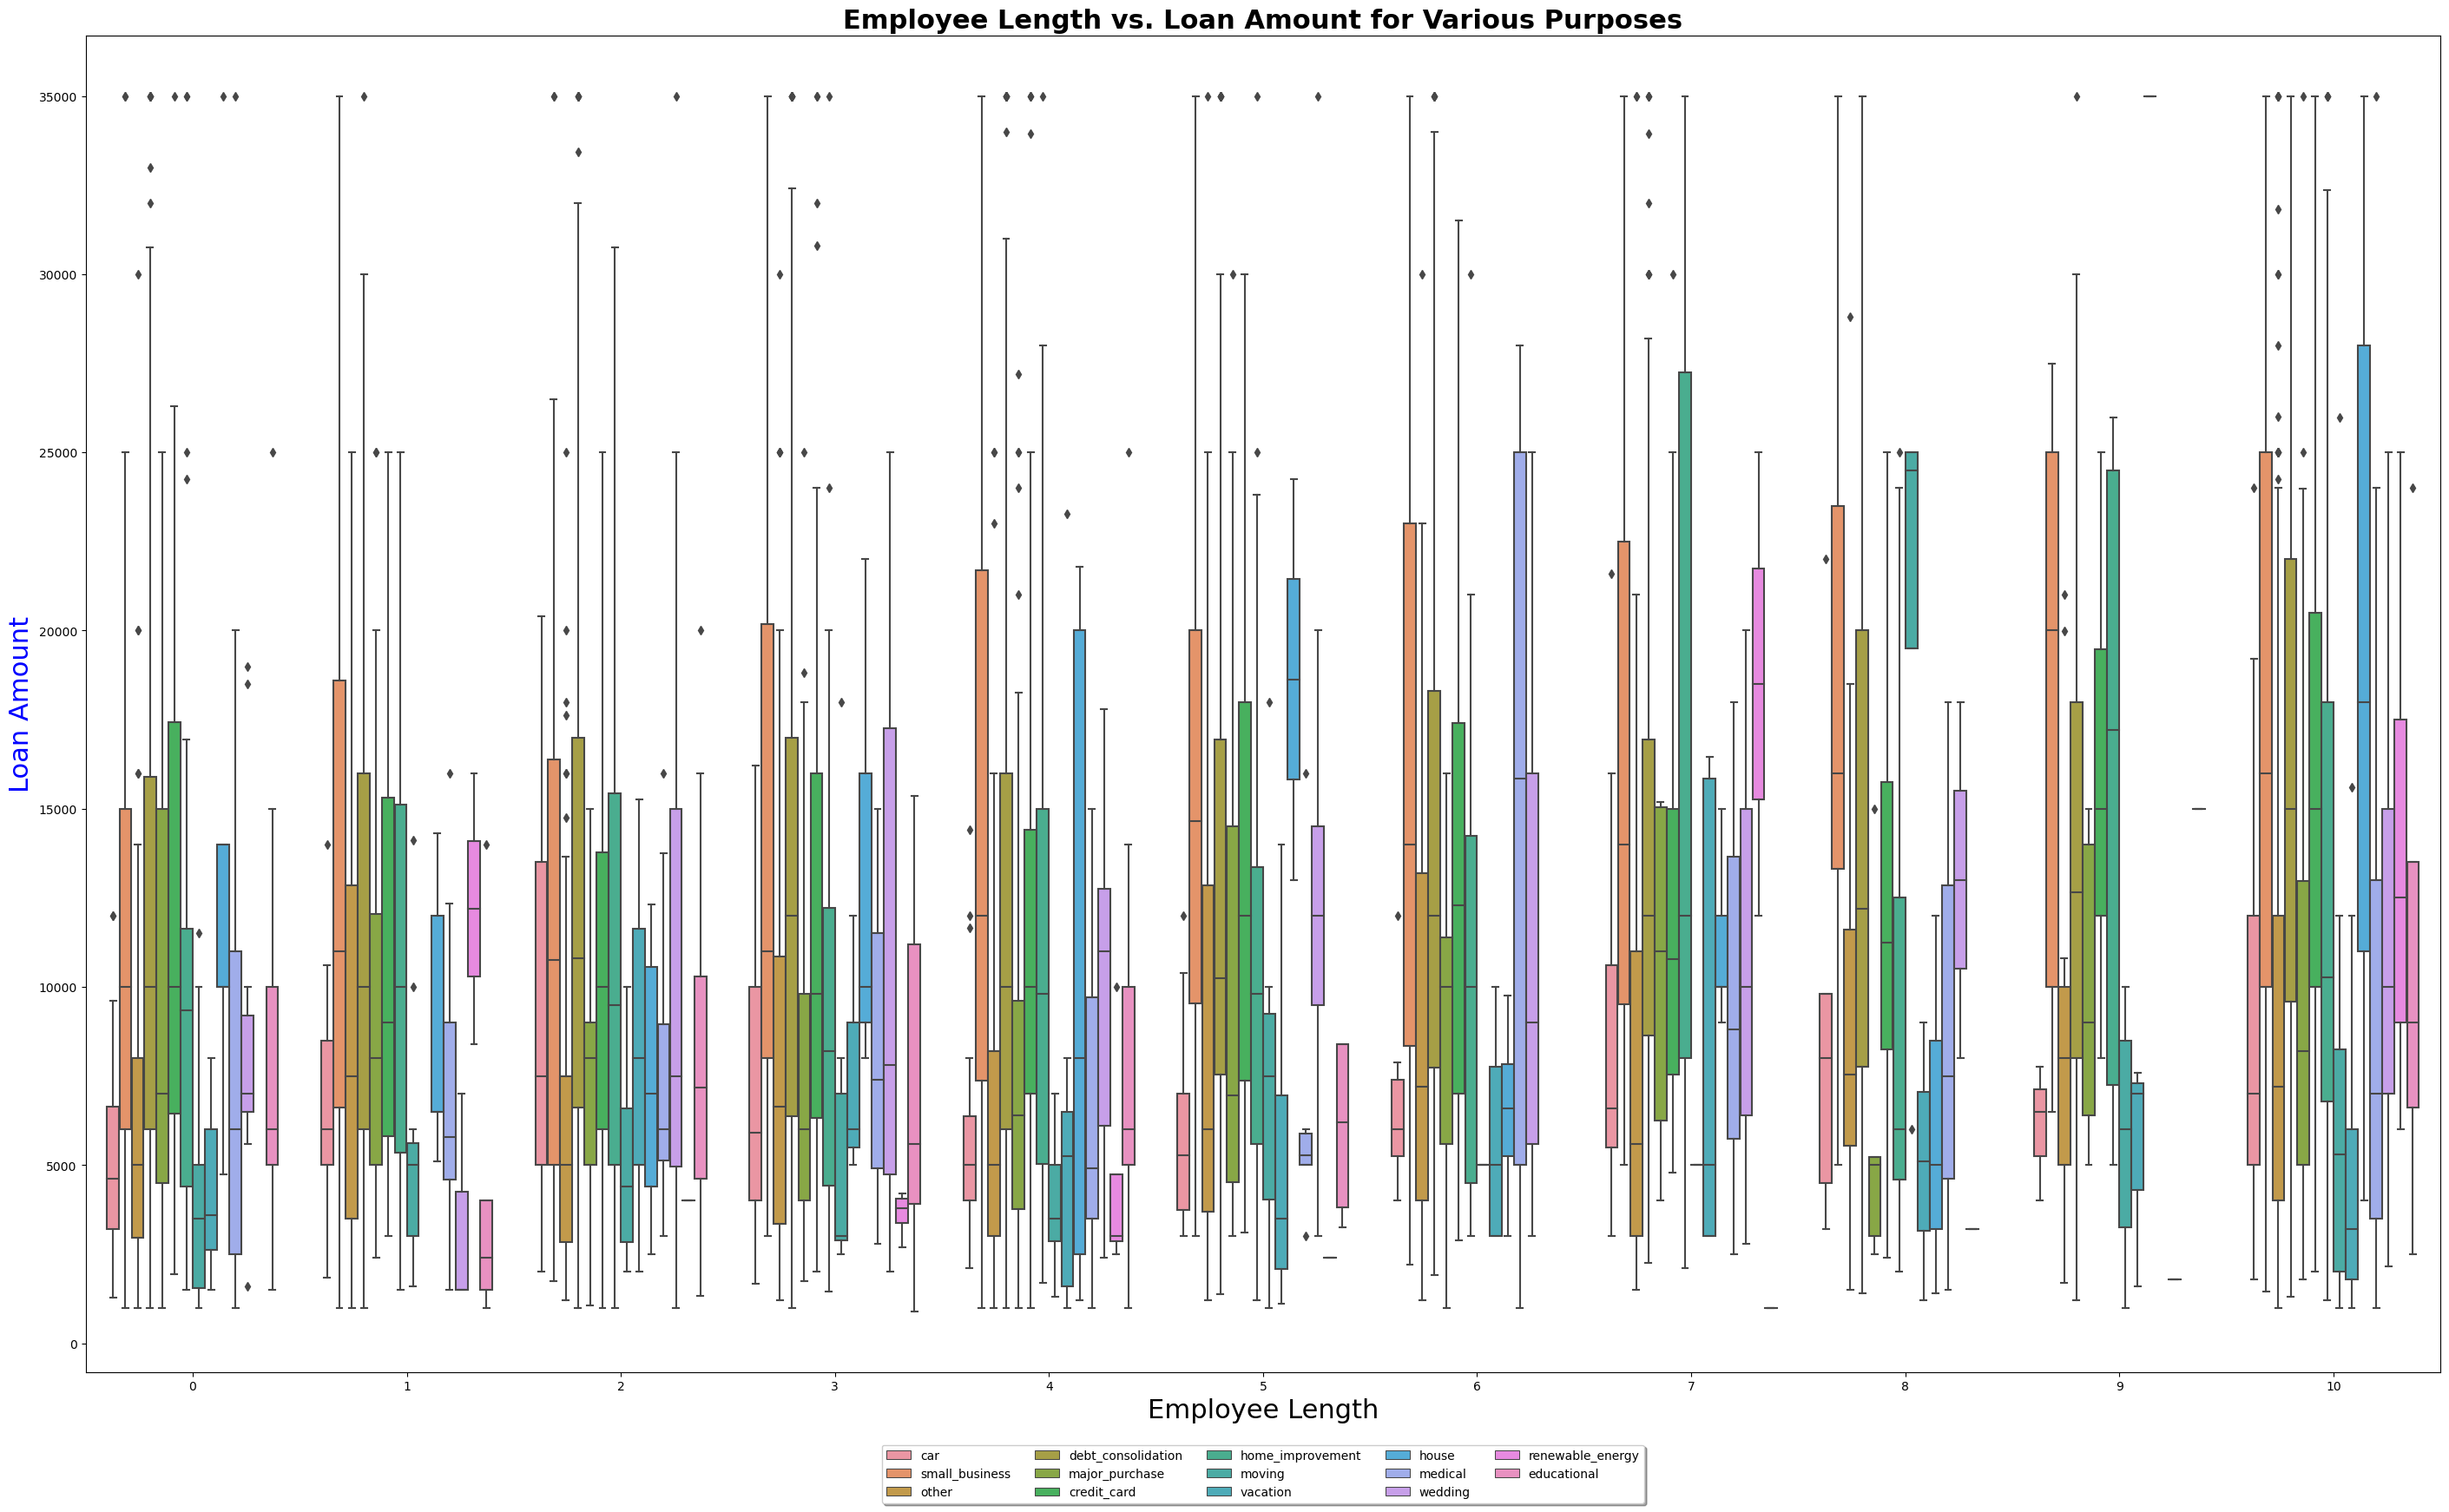

In [179]:
pivot_table = df.pivot_table(
    index=["loan_status", "purpose", "emp_length"],
    values="funded_amnt_inv",
    aggfunc="count"
).reset_index()

# Filtering out the loans with the status 'Charged Off'.
charged_off_loans = df[df["loan_status"] == "Charged Off"]

plt.figure(figsize=(35, 20))
boxplot = sns.boxplot(
    x="emp_length",
    y="loan_amnt",
    hue="purpose",
    data=charged_off_loans
)

# Setting the title and labels with font size and weight.
boxplot.set_title("Employee Length vs. Loan Amount for Various Purposes", fontsize=22, weight="bold")
boxplot.set_xlabel("Employee Length", fontsize=22)
boxplot.set_ylabel("Loan Amount", color='b', fontsize=22)
boxplot.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    fancybox=True,
    shadow=True,
    ncol=5
)

# Display the plot.
plt.show()

Insights:

Long-term employees often borrow more for homes.
Six-year employees borrow more for medical needs.
Nine-year employees typically don't borrow for education or personal events.
Objective:
Determine the likelihood of loan default by analyzing key variables.

Default Risk Indicators:

Employment Length
Loan Grades
Loan Purpose
Loan Amount (binned)
Interest Rate (binned)
Annual Income (binned)

##### Grades with default chances

In [ ]:
# helper fn
def calculate_defaulter(dataframe,column) :
    def_tab = pd.crosstab(dataframe[column], dataframe['loan_status'],margins=True)
    def_tab['All'] = def_tab['Charged Off'] + def_tab['Current'] + def_tab['Fully Paid']
    def_tab['Loan Default Probability'] = round((def_tab['Charged Off']/def_tab['All']),3)
    def_tab = def_tab[0:-1]
    return def_tab

def plot_bar_line_chart(df, column, stacked=False):
    # Calculate default probabilities
    default_probabilities = calculate_defaulter(df, column)
    fig, ax1 = plt.subplots(figsize=(20, 8))
    
    bars = default_probabilities.iloc[:, 0:3].plot(
        kind='bar',
        stacked=stacked,
        ax=ax1,
        rot=1,
        title=f"{column.title()} vs Loan Default Probability"
    )

    bars.set_ylabel('Number of Applicants', color='b', fontsize=20)
    bars.set_xlabel(column.title(), fontsize=14)
    
    # Plot the line chart
    line = default_probabilities['Loan Default Probability'].plot(
        secondary_y=True,
        marker='o',
        color='r',
        lw=2,
        ax=bars
    )
    
    # Configure line chart labels
    line.set_ylabel('Loan Default Probability', color='r', fontsize=20)
    plt.show()

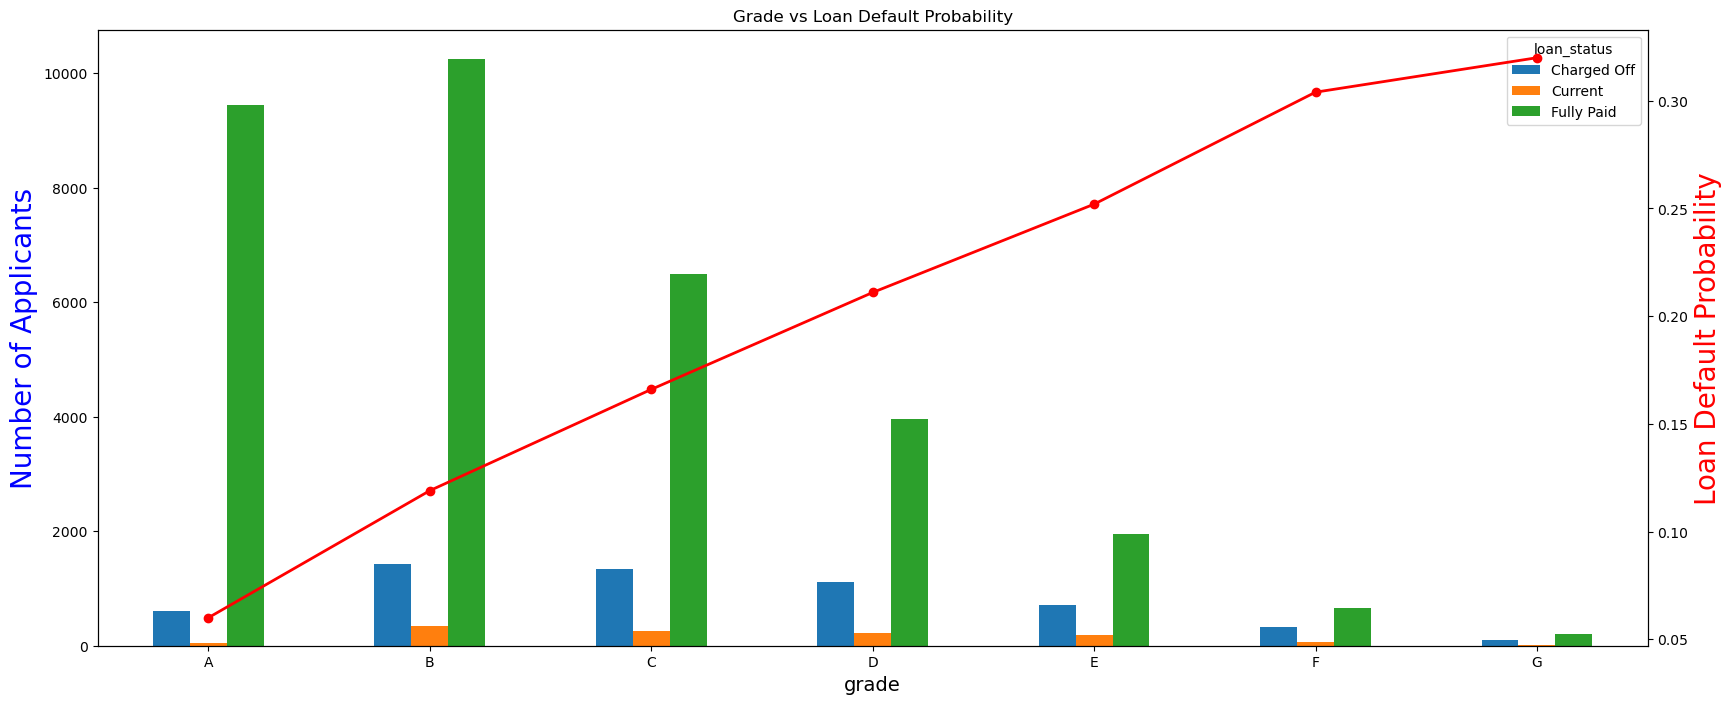

In [182]:
plot_bar_line_chart(df,"grade")

Insights

1) A lower rate of defaults is observed among borrowers with 9 years of employment.
2) A higher default rate is noted for borrowers with an employment length of 10 years or more.

##### Grades with default chances

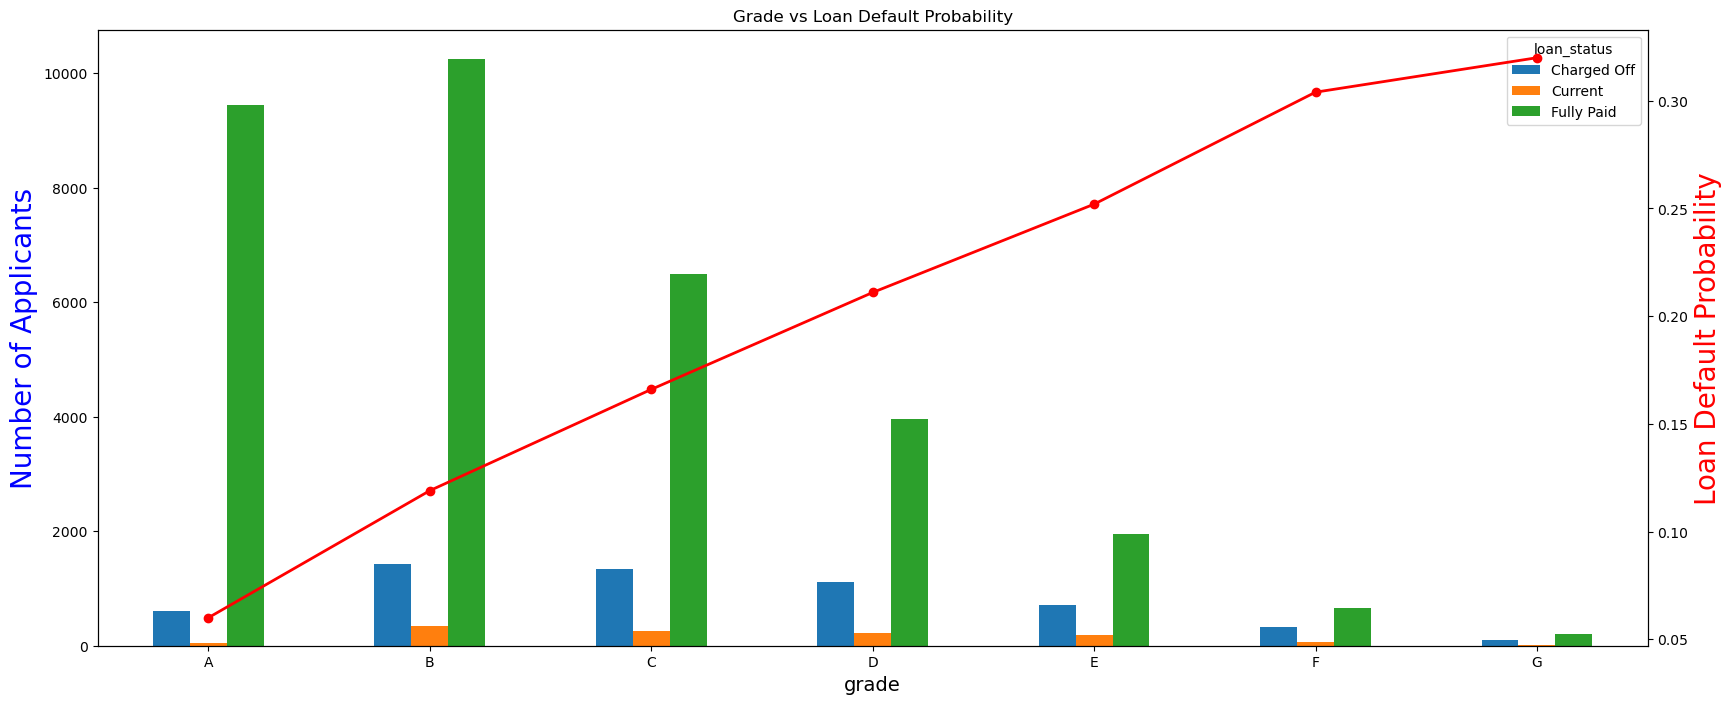

In [183]:
plot_bar_line_chart(df,"grade")

Insight: 
From grade A to G Loan Probability Defaulter increasing

##### Purpose With Default Chances

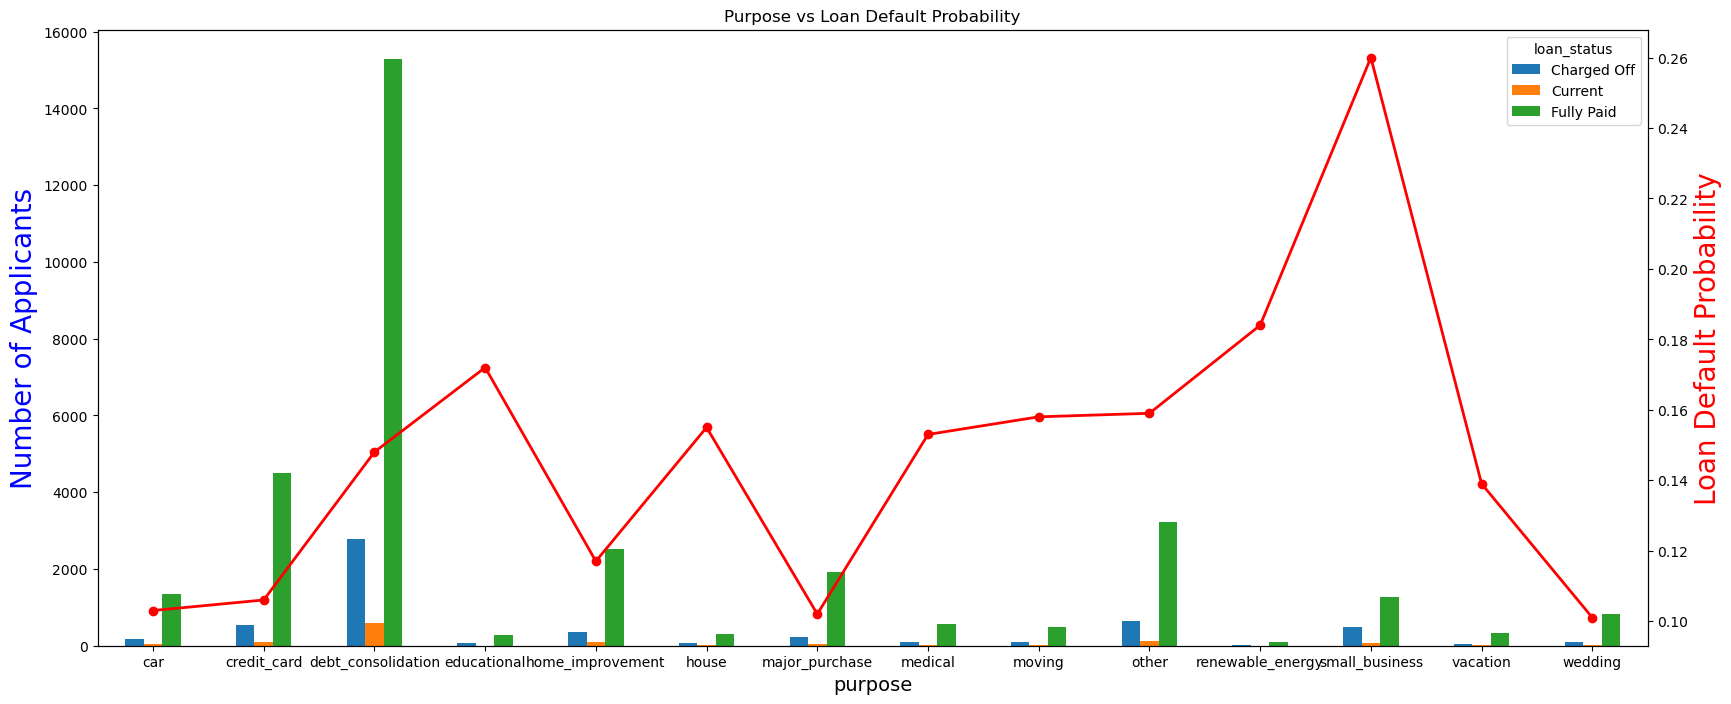

In [185]:
plot_bar_line_chart(df,"purpose")

Insights: 
loans requested for small businesses carry a higher probability of default. Therefore, banks should exercise increased diligence when approving these loans. Conversely, loans for major purchases exhibit the lowest rate of default.

Binning -> outlier in ANNUAL INCOME

In [189]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=slot)
df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,revol_util,last_pymnt_d,pub_rec_bankruptcies,annual_inc_range
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860,AZ,27.65,83.7,Jan-15,0.0,0-25000
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309,GA,1.00,9.4,Apr-13,0.0,25000-50000
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606,IL,8.72,98.5,Jun-14,0.0,0-25000
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917,CA,20.00,21.0,Jan-15,0.0,25000-50000
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,1,RENT,80000.0,Source Verified,Dec-11,Current,other,972,OR,17.94,53.9,May-16,0.0,75000-100000


##### Annual Income Range chance to be defaulter

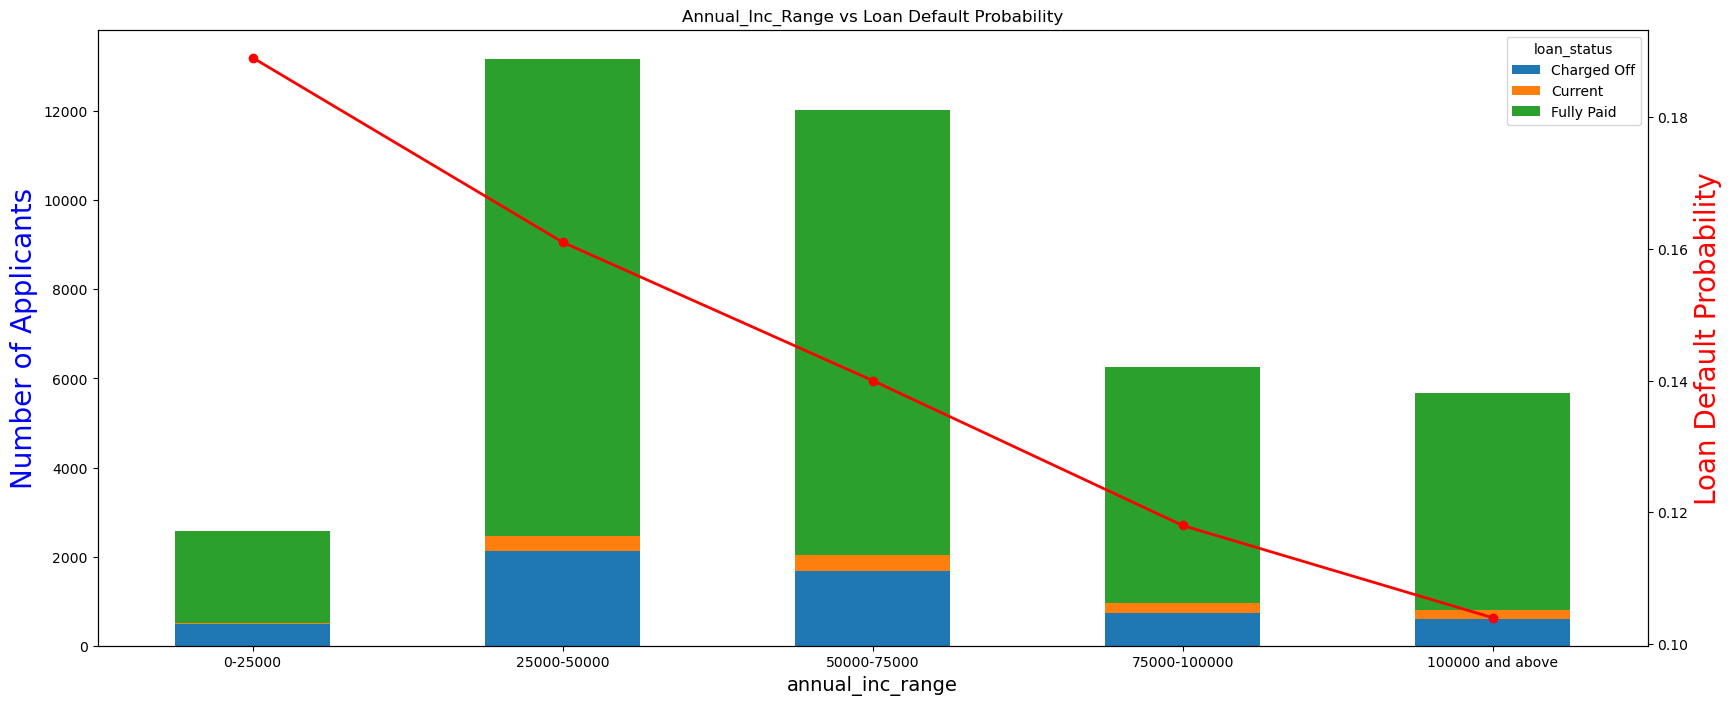

In [190]:
plot_bar_line_chart(df,"annual_inc_range",stacked=True)

Insight: We can can see, as annual income is increasing , probabality of being defaulter is also increasing , reaching up to 19%

##### Interest Range and chance to be defaulter

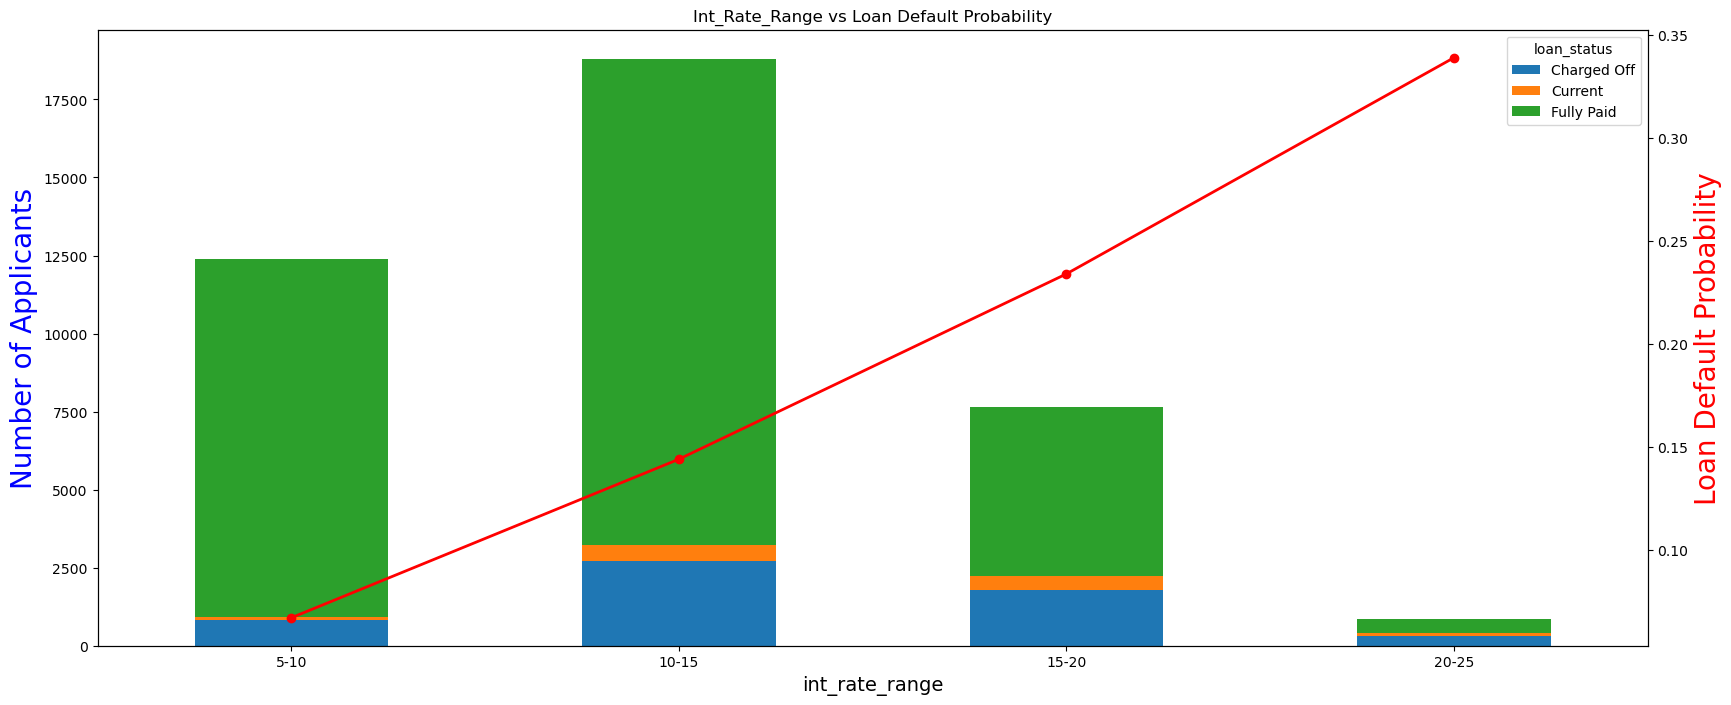

In [192]:
#Creating the int_rate_range binning 
bins = [0,5,10,15,20,25]
slot = ['0-5', '5-10', '10-15', '15-20','20-25']
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels=slot)
df.head(5)

plot_bar_line_chart(df,"int_rate_range",stacked=True)

Insight: 
data suggests a correlation between rising interest rates and an increased likelihood of default. Notably, when interest rates exceed 15%, the risk of default escalates significantly.

#### Loan Amount(approved) and chance of being defaulter

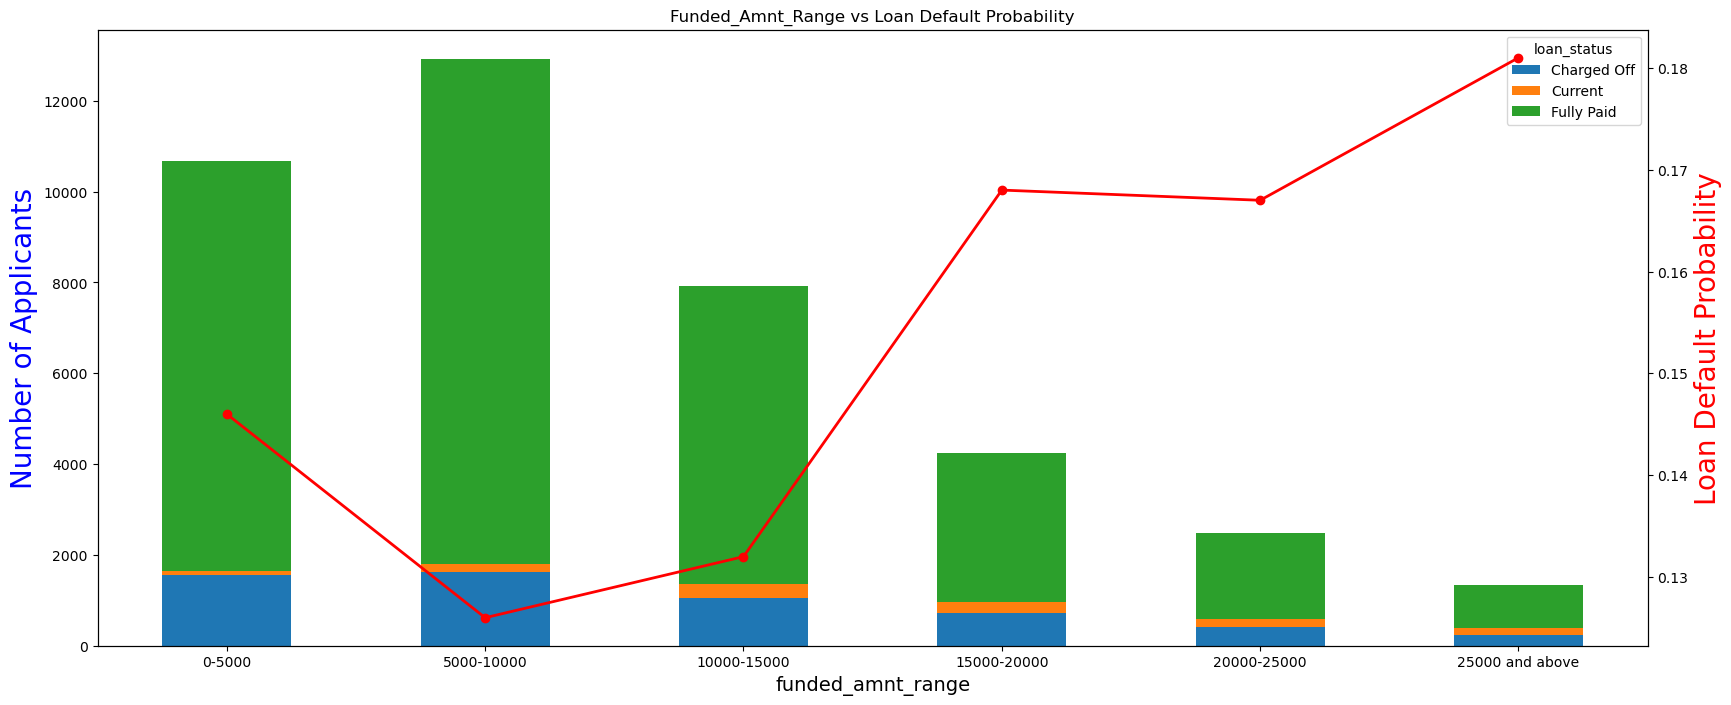

In [194]:
#Creating the funded_amnt_range binning 
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df['funded_amnt_range'] = pd.cut(df['funded_amnt_inv'], bins, labels=slot)
df.head(5)

plot_bar_line_chart(df,"funded_amnt_range",stacked=True)

Insight: the default rate tends to rise in tandem with increases in the loan or funded amount, particularly at an alarming rate.

### Conclusions


1) Interest Rates and Loan Amounts: Most loans have interest rates below 15% and amounts generally below 15k. High-value loans and rates are exceptions, not significantly impacting overall trends.


2) Borrower Income: Income distribution among borrowers is varied, with a significant number earning between 0 and 15k annually.


3) Repayment Trends: Installments typically range from 200 to 400, indicating a manageable repayment structure for the majority.


4) Loan Performance: A large proportion of loans are fully repaid, suggesting overall healthy loan performance. However, there's a noticeable risk of default, especially in high-interest and large loans.


5) Common Loan Purposes: Debt consolidation and credit card payments are the primary reasons for loan applications, necessitating a focused risk analysis in these categories.


6) Correlations and Risk Indicators: Notable correlations include loan amount with installment payments and interest rates. Default risk is higher in loans with prolonged employment lengths, higher grades (A to G), and specific purposes.


7) Default Trends: Lower default rates in borrowers with around 9 years of employment, higher in those with 10+ years. Increasing interest rates and loan amounts correlate with higher default risks.